#Inital settings#

open X:/Phagocytosis/sRBC/20190614cs1/track_3/Cell_CamB_ch0_stack0050_488nm_0376490msec_0004064137msecAbs_decon.tif;
open X:/Phagocytosis/sRBC/20190614cs1/track_3/Cell_CamA_ch1_stack0050_560nm_0376490msec_0004064137msecAbs_decon.tif;

volume #2 style surface level 118 color #ffd059;
volume #1 style surface level 73 color #2b5884;

lighting full; 
lighting depthcue false; 
surface dust #1,2 metric "volume rank" size 1 ;
measure convexity #1 range 0,1 smoothingIterations 5;

ui tool show Shell;

NOTE: Chimerax doc notes from website 
Link: https://www.cgl.ucsf.edu/chimerax/docs/devel/modules/core/commands/user_commands.html#chimerax.std_commands.measure_convexity.measure_convexity
acessed: 20230628

" Experimental API . Compute the convexity at each surface vertex defined as 2*pi minus the cone-angle spanned by the triangles incident at the vertex. The surface vertices are colored based on convexity value.

This definition of convexity is not standard and gives mottled coloring because the values depend strongly on the triangulation. Vertices surrounded by large triangles on a smooth surface will have sharper cone angles then vertices surrounded by small triangles. (Normalizing by vertex triangle areas does not help because the patch about a vertex is often irregular in shape.) To ameliorate this the “smoothing_iterations” option is useful. "

In [ ]:
from chimerax.color_key import show_key
from chimerax.core import colors
from chimerax.std_commands.wait import wait
from chimerax.core.commands import (BoolArg, Bounded, CmdDesc, ColormapArg,
                                    ColormapRangeArg, Int2Arg, IntArg,
                                    SurfacesArg, StringArg)
from chimerax.core.commands.cli import EnumOf
from chimerax.map.volumecommand import volume
from chimerax.std_commands.cd import (cd)
from os.path import exists
from numpy import (arccos, array, full, inf, isnan, mean, nan, nanmax, nanmean,
                   nanmin, pi, ravel_multi_index, sign, split, sqrt, subtract,
                   count_nonzero, swapaxes, savetxt, column_stack,nansum, nanstd,
                   unique, column_stack, round_, int64, abs, digitize, linspace,
                   zeros, where, delete)
from scipy.ndimage import (binary_dilation, binary_erosion,
                           generate_binary_structure, iterate_structure, gaussian_filter)
from scipy.spatial import KDTree
import numpy
import scipy
import matplotlib.pyplot as plt

In [ ]:
metric='RPD'
target ='sRBC'
size=(.1028,.1028,.1028)
palette=None
color_range= None
key=False
volume(session, voxel_size= size)
s= session
m= s.models
radius = 8
target_r = 2
centroid = mean(m[3].vertices, axis = 0)

x_coord, y_coord, z_coord = split(subtract(centroid, m[1].vertices), 3, 1)

z_squared = z_coord ** 2
y_squared = y_coord ** 2
x_squared = x_coord ** 2

distance = sqrt(z_squared + y_squared + x_squared)

distxy = sqrt(x_squared + y_squared)

""
theta = sign(y_coord)*arccos(x_coord / distxy)

phi = arccos(z_coord / distance)

"""Logic to identify vertices in the targets local (defined by radius input) around target's upper hemisphere"""
abovePhi = phi <= (pi/2)

radialClose = (distance  < radius) & (distance > target_r)

In [ ]:
con = m[1].convexity
edgeind = con>0

edgevertices = edgeind
edgevertices[edgevertices > 0]=1
m[1].edge= edgevertices*1

In [ ]:

palette = None
color_range = 'full'
measurement = m[1].edge
palette_string = 'purples'
max_range = 15

if isnan(measurement).all():
    measurement[:] = 0

    if palette is None:
        palette = colors.BuiltinColormaps[palette_string]

    if color_range is not None and color_range != 'full':
        rmin, rmax = color_range
    elif color_range == 'full':
        rmin, rmax = nanmin(measurement), nanmax(measurement)
    else:
        rmin, rmax = (0, max_range)

cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:])


output from chimerax convexity


measure convexity #1 range 0.5,1 smoothing 5

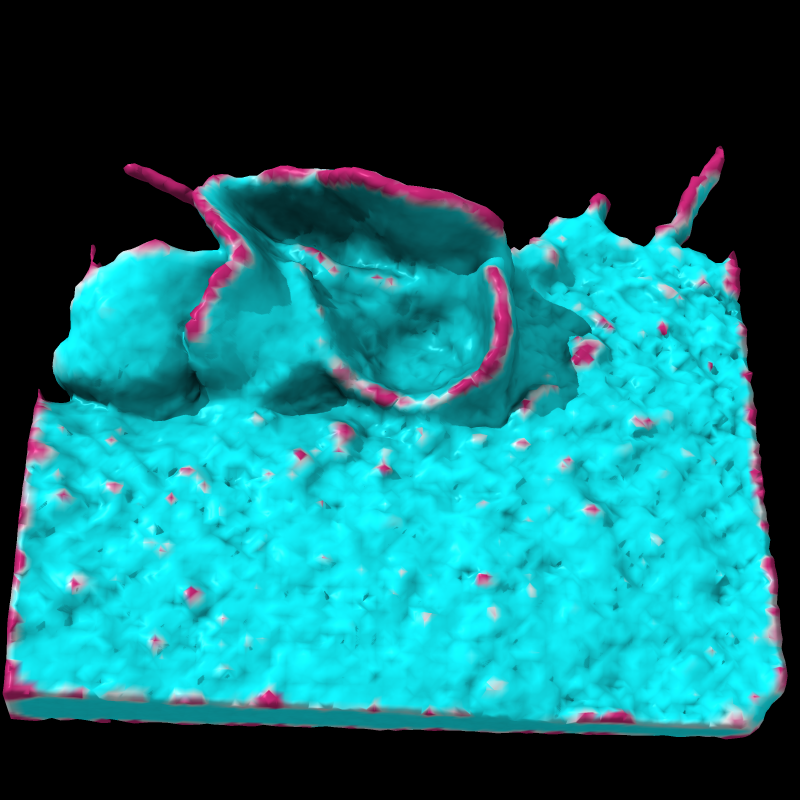

convexity >1

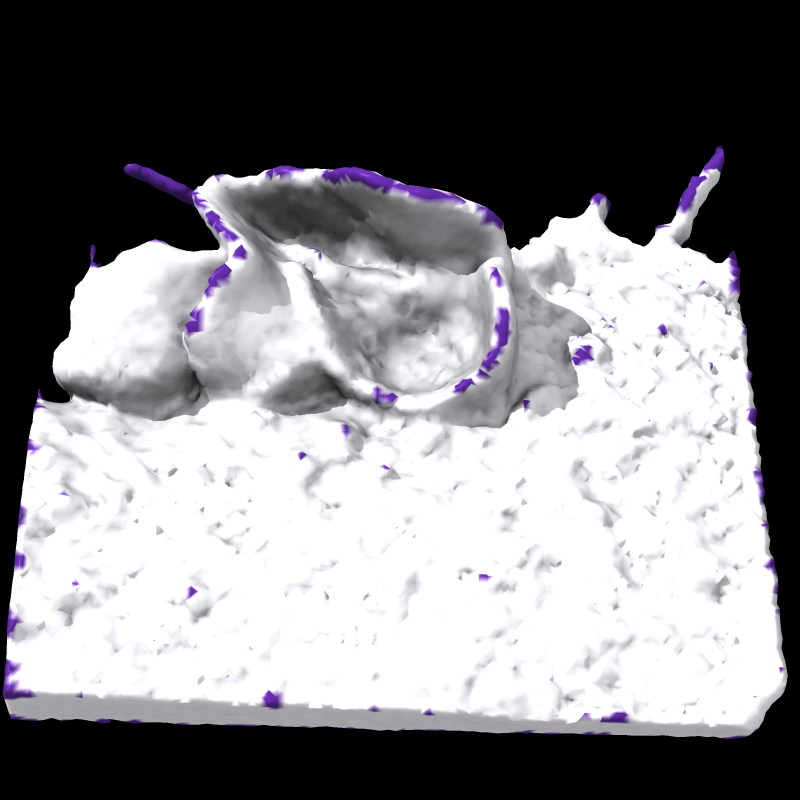

convexity >0.5

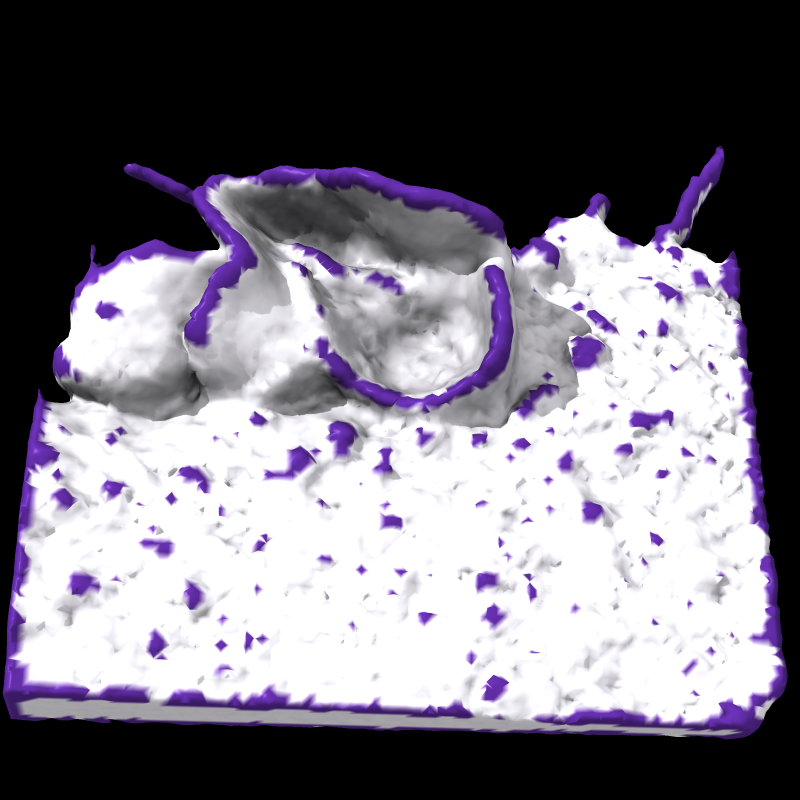

In [ ]:
abovePhi = phi <= (pi/2)
radialClose = (distance  < radius) & (distance > target_r)

up=m[1].edge*radialClose[:,0]

In [ ]:
palette = None
color_range = 'full'
measurement = up*1
palette_string = 'purples'
max_range = 'full'

In [ ]:

if isnan(measurement).all():
    measurement[:] = 0


In [ ]:
if palette is None:
    palette = colors.BuiltinColormaps[palette_string]

if color_range is not None and color_range != 'full':
    rmin, rmax = color_range
elif color_range == 'full':
    rmin, rmax = nanmin(measurement), nanmax(measurement)
else:
    rmin, rmax = (0, max_range)


In [ ]:
cmap = palette.rescale_range(rmin, rmax)
m[1].vertex_colors = cmap.interpolated_rgba8(measurement[:])